In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,NaN,NaN,72.99,NaN,NaN,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,NaN,3.62,1.24,NaN,NaN,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,NaN,0.00,2.02,73.42,NaN,NaN,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	23
float64		column 2	30
float64		column 3	43
float64		column 4	20
float64		column 5	50
float64		column 6	63
float64		column 7	70
float64		column 8	63
float64		column 9	10


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,191.000000,184.000000,171.000000,194.000000,164.000000,151.000000,144.000000,151.000000,204.000000
mean,1.518358,13.402446,2.748070,1.432113,72.626829,0.447351,8.834236,0.135894,0.057206
std,0.002968,0.805339,1.404234,0.493460,0.739658,0.301977,1.336923,0.439852,0.097569
min,1.511150,10.730000,0.000000,0.290000,69.890000,0.000000,5.430000,0.000000,0.000000
25%,1.516540,12.887500,2.260000,1.190000,72.280000,0.150000,8.227500,0.000000,0.000000
50%,1.517680,13.305000,3.490000,1.355000,72.775000,0.560000,8.560000,0.000000,0.000000
75%,1.519070,13.815000,3.610000,1.617500,73.052500,0.610000,9.132500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,1.760000,14.960000,2.880000,0.510000


<AxesSubplot:>

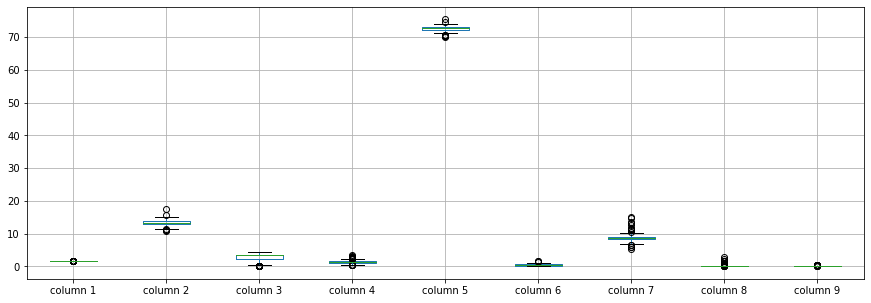

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518358
column 2    13.402446
column 3     2.748070
column 4     1.432113
column 5    72.626829
column 6     0.447351
column 7     8.834236
column 8     0.135894
column 9     0.057206
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.143971,-0.170743,-0.406574,-0.611147,-0.302824,0.763944,-0.149773,0.056914
column 2,-0.143971,1.000000,-0.281290,0.097801,-0.173209,-0.431189,-0.283821,0.411403,-0.214915
column 3,-0.170743,-0.281290,1.000000,-0.381612,-0.194310,0.357339,-0.355962,-0.520676,0.099992
column 4,-0.406574,0.097801,-0.381612,1.000000,-0.104194,0.261061,-0.296004,0.528528,-0.097928
column 5,-0.611147,-0.173209,-0.194310,-0.104194,1.000000,-0.029117,-0.085686,-0.103573,-0.039340
column 6,-0.302824,-0.431189,0.357339,0.261061,-0.029117,1.000000,-0.495349,0.174319,0.117844
column 7,0.763944,-0.283821,-0.355962,-0.296004,-0.085686,-0.495349,1.000000,-0.285475,0.124013
column 8,-0.149773,0.411403,-0.520676,0.528528,-0.103573,0.174319,-0.285475,1.000000,-0.126690
column 9,0.056914,-0.214915,0.099992,-0.097928,-0.039340,0.117844,0.124013,-0.126690,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+30,9+30+30,9+30+30+30,9+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30+30+30,9+30+30+30+30+30,9+30+30+30+30,9+30+30+30,9+30+30,9+30,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 79.37739093487079
Epoch: 1 , loss: 79.3035155076247
Epoch: 2 , loss: 79.64276709923378
Epoch: 3 , loss: 79.30480135404147
Epoch: 4 , loss: 79.03933539757362
Epoch: 5 , loss: 79.19278042133038
Epoch: 6 , loss: 78.8674424978403
Epoch: 7 , loss: 78.73781644381009
Epoch: 8 , loss: 79.17567913348859
Epoch: 9 , loss: 79.15195406400241
Epoch: 10 , loss: 78.46542857243465
Epoch: 11 , loss: 78.46534552940956
Epoch: 12 , loss: 78.41210966843825
Epoch: 13 , loss: 79.14576486440805
Epoch: 14 , loss: 79.46553538395808
Epoch: 15 , loss: 78.74899526742789
Epoch: 16 , loss: 79.5620357806866
Epoch: 17 , loss: 79.15517308161809
Epoch: 18 , loss: 78.38935411893405
Epoch: 19 , loss: 79.59565147986778
Epoch: 20 , loss: 78.44172961895282
Epoch: 21 , loss: 78.78210977407602
Epoch: 22 , loss: 79.22811830960788
Epoch: 23 , loss: 78.71200796274039
Epoch: 24 , loss: 78.40330681434044
Epoch: 25 , loss: 79.10724903987004
Epoch: 26 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,0.000000,-3.190733,-1.234084,0.000000,-0.221731,-7.192799,0.000000,0.00000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.0,-12.533083,0.000000,0.000000,-71.500841,-0.412731,-7.492378,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
209,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
210,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
211,0.0,-13.539109,0.000000,0.000000,0.000000,0.143631,-7.813513,-1.628666,0.00000
212,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(508.058885059504, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.4659227076486487

In [18]:
new_df.iloc[66,:]

column 1     0.673137
column 2    13.050000
column 3     0.946460
column 4     0.870000
column 5    72.220000
column 6     0.269665
column 7     9.850000
column 8     0.003895
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.640000,4.490000,1.100000,71.780000,0.060000,8.750000,0.000000,0.00000
1,1.51761,13.890000,3.600000,1.360000,72.730000,0.480000,7.830000,0.000000,0.00000
2,1.51618,13.530000,0.359267,0.305916,72.990000,0.168269,0.587201,0.000000,0.00000
3,1.51766,13.210000,3.690000,1.290000,72.610000,0.570000,8.220000,0.000000,0.00000
4,1.51742,0.736917,3.620000,1.240000,1.579159,0.137269,0.577622,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.140000,0.000000,2.880000,72.610000,0.080000,9.180000,1.060000,0.00000
210,1.51685,14.920000,0.000000,1.990000,73.060000,0.000000,8.400000,1.590000,0.00000
211,1.52065,0.820891,0.000000,2.020000,73.420000,0.143631,0.626487,0.011334,0.00000
212,1.51651,14.380000,0.000000,1.940000,73.610000,0.000000,8.480000,1.570000,0.00000


In [20]:
imputations[-1].to_excel("Glass_AL_20(imp).xlsx", index=False, header=False)